###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [2]:
f1=pd.read_csv("college_1.csv")
f2=pd.read_csv("college_2.csv")
f1[["python_en","computational_thinking"]]=0
f3=pd.concat([f1,f2],ignore_index=True)

###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [3]:
#f1
m11=f1["CodeKata Score"]>15000
m12=f1["CodeKata Score"]<=15000
m13=f1["CodeKata Score"]<=10000
m14=f1["CodeKata Score"]<=7000

In [4]:
#f2
m21=f2["CodeKata Score"]>15000
m22=f2["CodeKata Score"]<=15000 
m23=f2["CodeKata Score"]<=10000
m24=f2["CodeKata Score"]<=7000

In [5]:
f1_Exceeded_expectations=f1.loc[m11]
f1_Reached_expectations=f1.loc[m12 & -m13]
f1_Needs_Improvement=f1.loc[m13 & -m14]
f1_Unsatisfactory=f1.loc[m14]
f2_Exceeded_expectations=f2.loc[m21]
f2_Reached_expectations=f2.loc[m22 & -m23]
f2_Needs_Improvement=f2.loc[m23 & -m24]
f2_Unsatisfactory=f2.loc[m24]

In [6]:
f1_Exceeded_expectations.to_csv("college_1_Exceeded_expectations.csv")
f1_Reached_expectations.to_csv("college_1_Reached_expectations.csv")
f1_Needs_Improvement.to_csv("college_1_Needs_Improvement.csv")
f1_Unsatisfactory.to_csv("college_1_Unsatisfactory.csv")
f2_Exceeded_expectations.to_csv("college_2_Exceeded_expectations.csv")
f2_Reached_expectations.to_csv("college_2_Reached_expectations.csv")
f2_Needs_Improvement.to_csv("college_2_Needs_Improvement.csv")
f2_Unsatisfactory.to_csv("college_2_Unsatisfactory.csv")

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [7]:
f3.mean()[["Previous Geekions","CodeKata Score"]]

Previous Geekions    3842.352941
CodeKata Score       4051.764706
dtype: float64

###### No of students participated 

In [8]:
f3.count()[0]

119

###### #Average completion of python course or my_sql or python english or computational thinking

In [9]:
f3.mean()[["python","mysql","python_en","computational_thinking"]]

python                    54.352941
mysql                     23.500000
python_en                  8.722689
computational_thinking     0.647059
dtype: float64

###### rising star of the week (top 3 candidate who performed well in that particular week)

In [10]:
print(*list(f3.sort_values(by=["Rising"],ascending=False)[:3]["Name"]),sep="\n")

shifak N
Narasimhan Y L
Ganesh Ramkumar R


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [11]:
print(*list(f3.sort_values(by=["CodeKata Score"],ascending=False)[:3]["Name"]),sep="\n")

A.Dharani
V.JEEVITHA 
HEMAVATHI.R


###### Department wise codekata performence (pie chart)

([<matplotlib.patches.Wedge at 0x22eb5b94280>,
 [Text(0.13490819619649513, 1.0916958269586856, 'Computer Science and Engineering'),
  Text(-0.9401648049597914, -0.5710430277263856, 'Electronics and Communication Engineering'),
  Text(0.6820374803157301, -0.8630323721880717, 'Electronics and Electrical Engineering')])

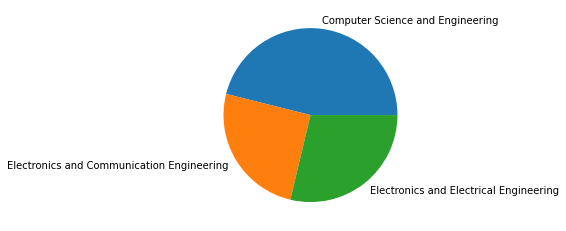

In [12]:
d=dict(f3.groupby("Department").mean()["CodeKata Score"])
plt.pie(d.values(),labels=d.keys())

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [13]:
d=dict(f3.groupby("Department").max()["CodeKata Score"])
d

{'Computer Science and Engineering': 24500,
 'Electronics and Communication Engineering': 10040,
 'Electronics and Electrical Engineering': 19400}

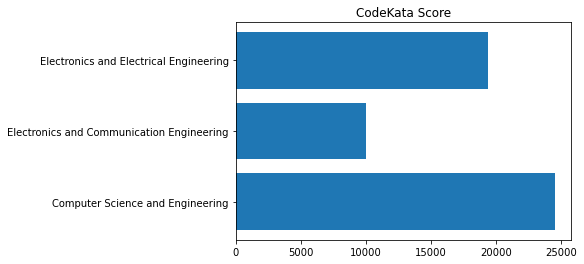

In [14]:
x=d.values()
y=d.keys()
plt.barh(list(y), list(x))
plt.title("CodeKata Score")
plt.show()